## DESAFÍO 1


GRUPO 5

Integrantes:

- Facundo Gutierrez
- Fiamma Cabrera
- Ivan Schmitt
- Maria del Mar Gelabert
- Solange Baralia

En este desafío vamos a trabajar con un dataset de propiedades en venta publicadas en Properati.

**Objetivos**

- Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias
para lidiar con los datos perdidos en ciertas variables.
- Realizar un análisis descriptivo de las principales variables.
- Crear nuevas columnas a partir de las características dadas que puedan tener valor
predictivo.El objetivo es dar los primeros pasos en el proceso de exploración de datos usando las herramientas que trabajamos en las activades.


#### INDICE (FALTA COMPLETAR)

* 1 . LIMPIEZA DE DATOS Y PREPARACIÓN DEL DATASET
    + 1.1 - Importar librerías y cargar el dataset
    + 1.2 - Limpieza básica de datos
    + 1.3 - 
* 2 NOMBRE
    + 2.1
    + 2.2
    + 2.3
* 3 NOMBRE


#### 1- LIMPIEZA DE DATOS Y PREPARACIÓN DEL DATASET

##### 1.1 - Importar Librerías y cargar el dataset

Para poder trabajar en la limpieza de datos y la visualización de nuestro dataset vamos a utilizar las librerías numpy, pandas, matplotlib, seaborn y re (expresiones regulares).

In [1]:
# Importamos las librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Luego cargamos los datos
df = pd.read_csv("./Data/properatti.csv")

In [3]:
# Cuántas columnas y filas tiene el dataset? 

print("El dataset tiene: ", df.shape[0], "filas y", df.shape[1], "columnas.")

El dataset tiene:  121220 filas y 26 columnas.


In [4]:
# Cuáles son los nombres de las columnas?

print("Las columnas son:", df.columns)

Las columnas son: Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')


In [5]:
# Para ver las primeras filas de nuestro dataframe:

df.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [6]:
# Para conocer los nombres de las columnas, los tipos de datos y cuántos datos no son nulos:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

Más adelante vamos a analizar en profundidad qué decisiones tomar con las variables nulas.
Por ahora, vamos a calcular el porcentaje de nulos que contiene cada uno de ellos:

In [7]:
cantidad_nulos_por_variable = df.apply(lambda x: x.isnull().sum(), axis=0)
print(cantidad_nulos_por_variable)

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64


In [8]:
cantidad_registros = df.shape[0]
print(cantidad_registros)

porc_nulos_por_variable = 100 * cantidad_nulos_por_variable / cantidad_registros
print(porc_nulos_por_variable)

121220
Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.

In [9]:
# Para obtener un resumen de toda esta información por tipo de variable (CORREGIR!!!!  - acá deberíamos lograr agrupar la info anterior calculada, en una tabla con las columnas definidas abajo)

df_resumen = df.copy()

df_resumen['tipo_datos'] = df.dtypes
df_resumen['cantidad_nulos'] = cantidad_nulos_por_variable
df_resumen['porcentaje_nulos'] = porc_nulos_por_variable

df_resumen = df_resumen[['tipo_datos', 'cantidad_nulos','porcentaje_nulos']]
df_resumen

,tipo_datos,cantidad_nulos,porcentaje_nulos
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
121215,NaN,NaN,NaN
121216,NaN,NaN,NaN
121217,NaN,NaN,NaN
121218,NaN,NaN,NaN


In [10]:
# ( la idea serìa agregar estas dos columnas a la info arriba anunciada, para poder visualizar en una sola tabla, por cada variable: el tipo de dato, la cantidad de nulos, 
del % de nulos, la cantidad de valores únicos y un ejemplo del tipo de datos que hay en cada columna - CORREGIR!!!!!)

valores = []
ejemplos = []

for x in df:
    valores.append(len(df[x].unique()))
    ejemplos.append(df[x].unique())
    
df_resumen['valores_unicos'] = valores
df_resumen['ejemplo_datos'] = ejemplos


df_resumen = df_resumen[['tipo_datos', 'cantidad_nulos','porcentaje_nulos','valores_unicos','ejemplo_datos' ]]

df_resumen

ValueError: Length of values (26) does not match length of index (121220)

##### 1.2 - Limpieza básica

##### ¡Empecemos con la **limpieza!**

La idea de esta etapa es lograr un dataset limpio con el cual poder graficar y, posteriormente, generar un modelo predictivo. Comenzaremos realizando una limpieza básica de los datos. 

In [11]:
 # Detectamos que la primera columna es un índice autogenerado que no nos aporta información, por lo tanto la eliminaremos:
df.drop("Unnamed: 0", axis=1)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,NaN,...,93.0,7699.115044,9354.838710,NaN,NaN,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...
121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,NaN,NaN,...,360.0,1383.333333,1383.333333,NaN,NaN,NaN,http://www.properati.com.ar/1cja6_venta_casa_b...,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,https://thumbs4.properati.com/2/PCc3WuQDjpNZc4...
121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,...,39.0,2858.695652,3371.794872,NaN,NaN,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...
121218,sell,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,NaN,NaN,NaN,...,48.0,1997.916667,1997.916667,NaN,NaN,NaN,http://www.properati.com.ar/1cja8_venta_depart...,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...,https://thumbs4.properati.com/8/Q12PTvU6BQJ0ib...


Al ejecutar el comando anterior, el mismo nos devolvió un nuevo DataFrame sin la columna que elegimos. Para que se efectúe la eliminación en el DataFrame df tenemos que usar el parámetro inplace=True.

In [12]:
df.drop("Unnamed: 0", axis=1, inplace = True)

In [13]:
# Verificamos que todas las operaciones sean ventas
df["operation"] 

0         sell
1         sell
2         sell
3         sell
4         sell
          ... 
121215    sell
121216    sell
121217    sell
121218    sell
121219    sell
Name: operation, Length: 121220, dtype: object

In [14]:
# Contamos la cantidad de cada valor
df["operation"].value_counts() 

sell    121220
Name: operation, dtype: int64

Ya que todas las operaciones son de venta, decidimos borrar la columna.

In [15]:
df = df.drop("operation", axis = 1)

Vamos a observar que **tipos de propiedades** contiene el dataset

In [16]:
tipos = df["property_type"].unique()
print ("El dataset contiene los siguientes tipos de propiedades: " ,tipos)

El dataset contiene los siguientes tipos de propiedades:  ['PH' 'apartment' 'house' 'store']


In [17]:
propiedades = df["property_type"].value_counts()
print(propiedades)

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64


A continuación, graficamos las cantidades por tipo de propiedad.

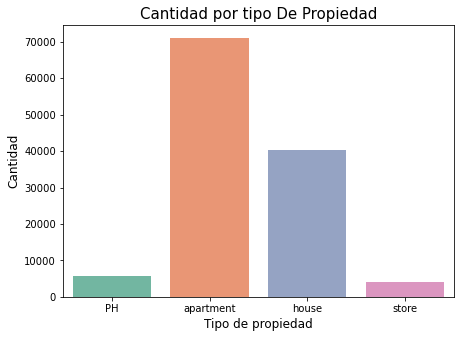

In [18]:
plt.figure(figsize = (7,5))
ax = sns.countplot(x="property_type", data=df,palette="Set2")
plt.xlabel('Tipo de propiedad', size = 12)
plt.ylabel('Cantidad', size = 12)
plt.title('Cantidad por tipo De Propiedad', size = 15)

plt.show()

In [19]:
# Calculamos las estadísticas descriptivas (media, meadiana, máx, mín, std y conteos) de las columnas numéricas:
df.describe()  

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


Para continuar con el análisis de las variables, vamos a observar la correlación que tienen entre ellas.

In [20]:
df.corr()  

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
geonames_id,1.000000,0.166446,-0.293347,0.037997,-0.041616,-0.041616,2.350088e-04,-0.005824,-0.041274,0.056873,-0.025147,0.063870,-2.736558e-03
lat,0.166446,1.000000,-0.294338,0.174643,0.067063,0.067063,9.125336e-03,0.008079,0.050212,0.086109,-0.040754,0.098654,4.695984e-03
lon,-0.293347,-0.294338,1.000000,-0.187412,-0.026092,-0.026092,-4.066232e-02,-0.009536,0.038563,-0.087840,0.059644,-0.161893,-2.613714e-03
price,0.037997,0.174643,-0.187412,1.000000,0.329037,0.329037,1.134865e-01,0.047523,0.111961,0.501541,-0.009257,0.128777,8.051121e-03
price_aprox_local_currency,-0.041616,0.067063,-0.026092,0.329037,1.000000,1.000000,3.011366e-01,0.165531,0.311328,0.056121,-0.003029,0.182916,1.100998e-02
price_aprox_usd,-0.041616,0.067063,-0.026092,0.329037,1.000000,1.000000,3.011366e-01,0.165531,0.311328,0.056121,-0.003029,0.182916,1.100998e-02
surface_total_in_m2,0.000235,0.009125,-0.040662,0.113487,0.301137,0.301137,1.000000e+00,0.195453,-0.047708,-0.021952,0.013522,0.106810,7.945656e-07
surface_covered_in_m2,-0.005824,0.008079,-0.009536,0.047523,0.165531,0.165531,1.954531e-01,1.000000,-0.050408,-0.020582,-0.000677,0.162912,7.976653e-04
price_usd_per_m2,-0.041274,0.050212,0.038563,0.111961,0.311328,0.311328,-4.770796e-02,-0.050408,1.000000,0.177082,0.158965,-0.173599,1.662794e-02
price_per_m2,0.056873,0.086109,-0.087840,0.501541,0.056121,0.056121,-2.195167e-02,-0.020582,0.177082,1.000000,-0.019437,-0.049194,-2.432707e-03


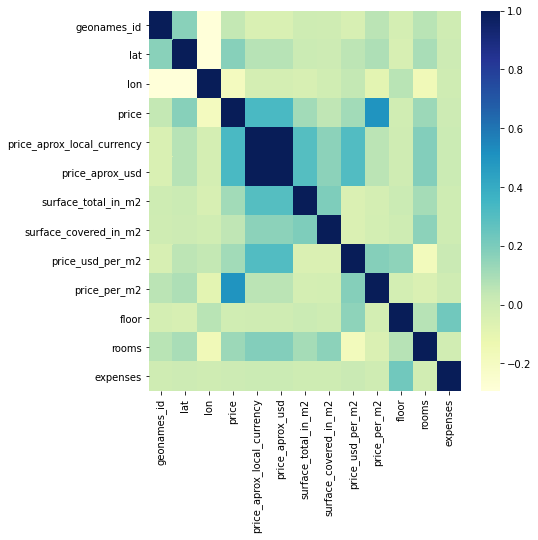

In [21]:
# Graficamos la correlación entre las variables

fig =plt.subplots(figsize=(7,7))
correlacion = df.corr()  
sns.heatmap(correlacion, cmap='YlGnBu')

**FALTA =  Aca deberiamos armar una conclusión de las correlaciones** - Quizás esta info va a ser más útil calcularla una vez que sepamos cuáles columnas borrar